<a href="https://colab.research.google.com/github/xthimylJ/Data-Science-Projects/blob/main/SHAD_contest_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
df = pd.read_csv("/content/train_weights.csv")
df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,MSE
0,0.355,0.612,0.482,-1.220,-0.412,-0.745,-1.172,-1.760,0.479,1.180,69.113
1,-0.571,0.767,0.537,-0.904,-0.114,0.042,0.739,0.110,-1.743,1.831,67.790
2,0.389,-0.994,-1.537,-0.871,-0.351,-0.679,-0.475,-1.019,0.555,-1.048,32.273
3,0.539,0.679,-1.504,-0.472,0.909,0.158,0.866,1.084,-1.127,-0.436,18.747
4,0.289,-0.284,0.330,1.462,-0.205,0.213,-0.133,-2.064,-0.846,-0.223,62.239


In [3]:
df.shape

(1000, 11)

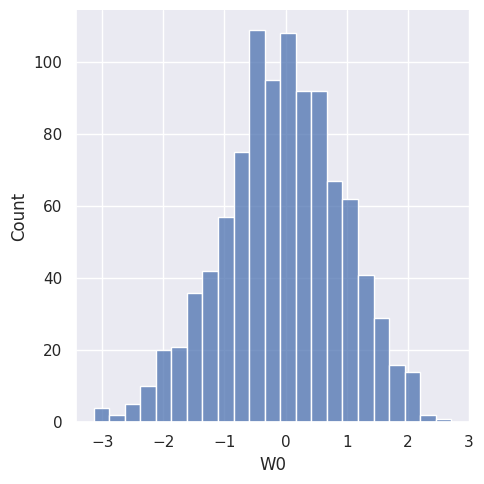

In [4]:
sns.displot(df["W0"])
plt.show()

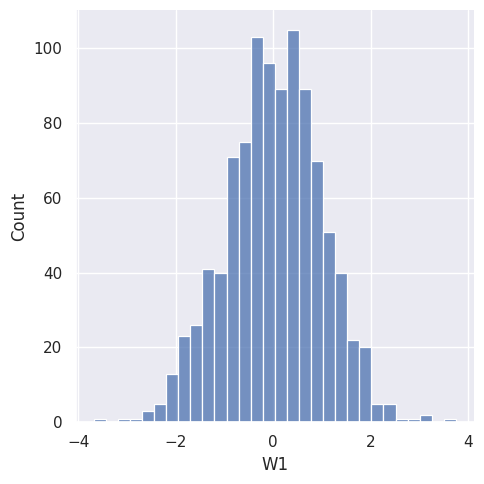

In [5]:
sns.displot(df["W1"])
plt.show()

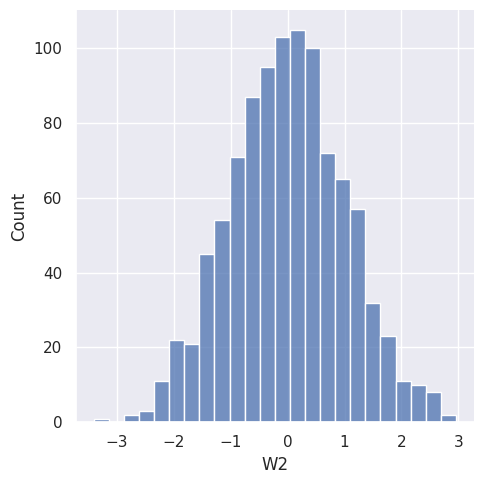

In [6]:
sns.displot(df["W2"])
plt.show()

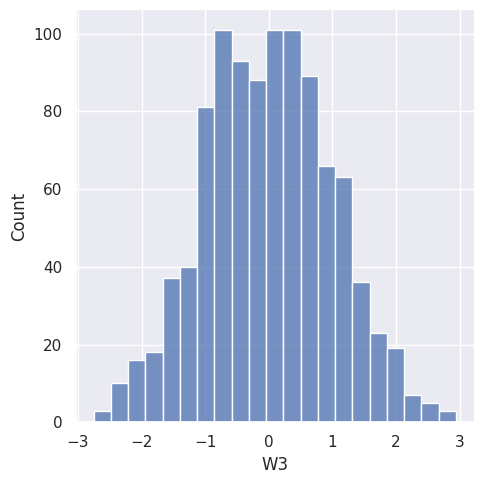

In [7]:
sns.displot(df["W3"])
plt.show()

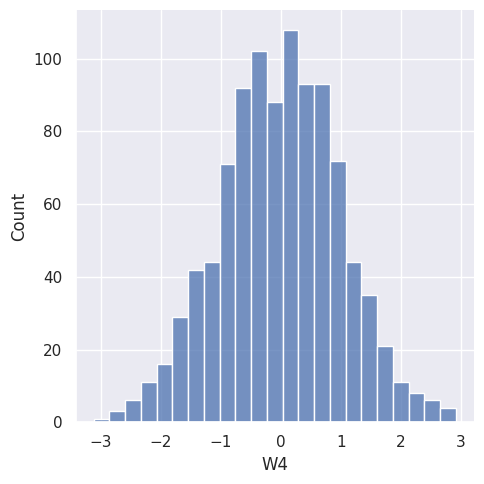

In [8]:
sns.displot(df["W4"])
plt.show()

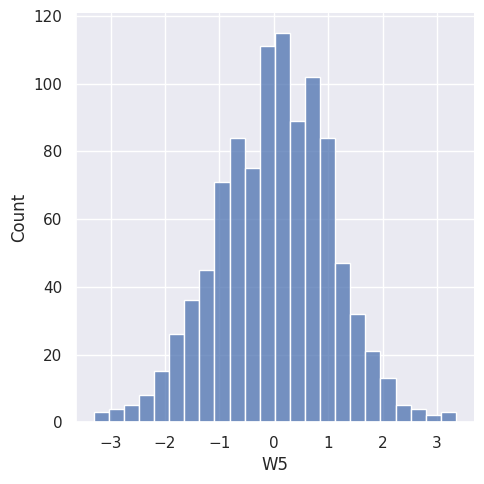

In [9]:
sns.displot(df["W5"])
plt.show()

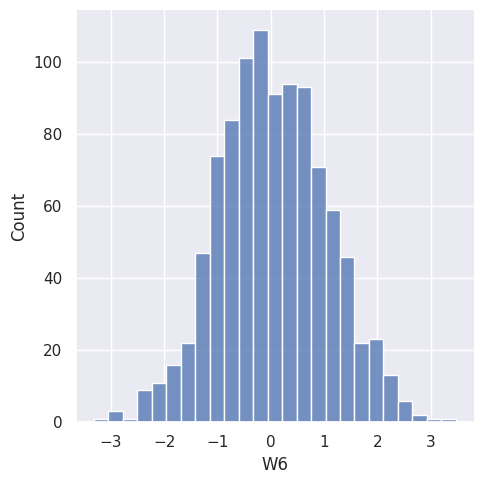

In [10]:
sns.displot(df["W6"])
plt.show()

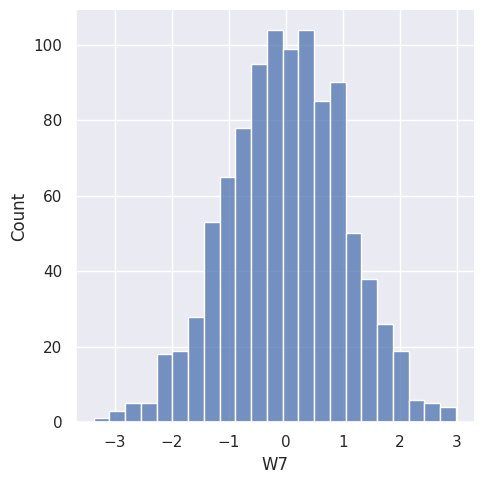

In [11]:
sns.displot(df["W7"])
plt.show()

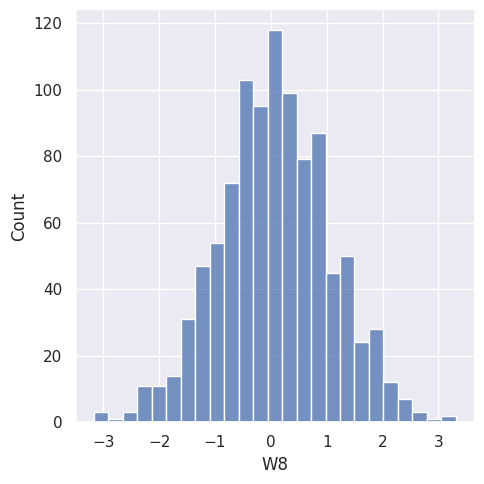

In [12]:
sns.displot(df["W8"])
plt.show()

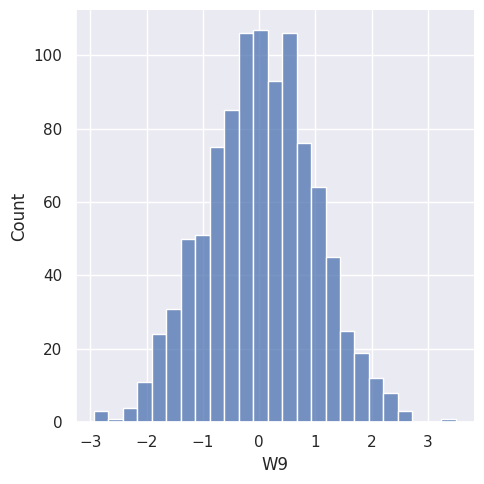

In [13]:
sns.displot(df["W9"])
plt.show()

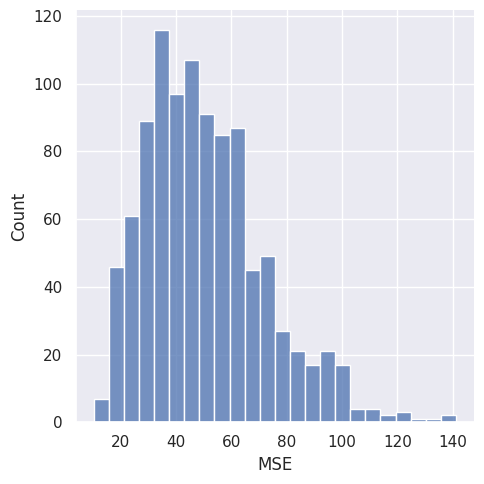

In [14]:
sns.displot(df["MSE"])
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W0      1000 non-null   float64
 1   W1      1000 non-null   float64
 2   W2      1000 non-null   float64
 3   W3      1000 non-null   float64
 4   W4      1000 non-null   float64
 5   W5      1000 non-null   float64
 6   W6      1000 non-null   float64
 7   W7      1000 non-null   float64
 8   W8      1000 non-null   float64
 9   W9      1000 non-null   float64
 10  MSE     1000 non-null   float64
dtypes: float64(11)
memory usage: 86.1 KB


* each column follows normal distribution
* target variable a little bit right skewed

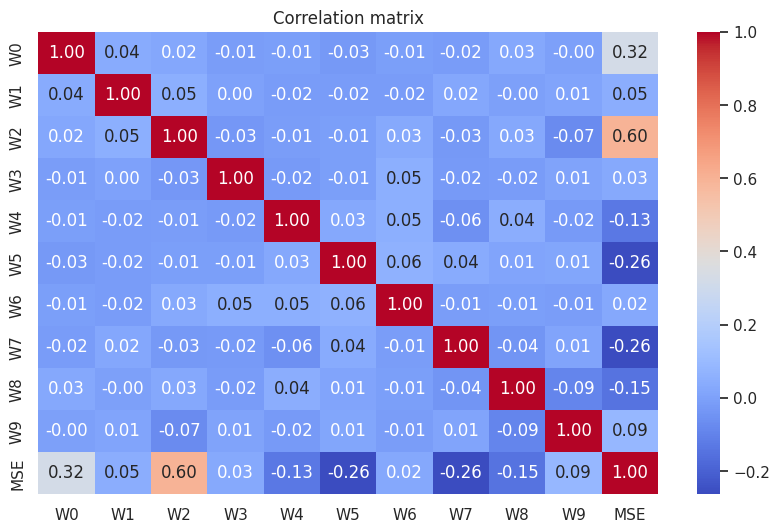

In [18]:
# let's check correlations
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [19]:
df.isnull().sum()

,0
W0,0
W1,0
W2,0
W3,0
W4,0
W5,0
W6,0
W7,0
W8,0
W9,0


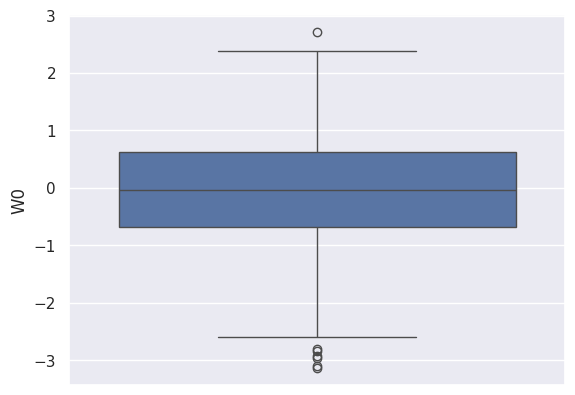

In [20]:
# let's check for outliers
sns.boxplot(df["W0"])
plt.show()

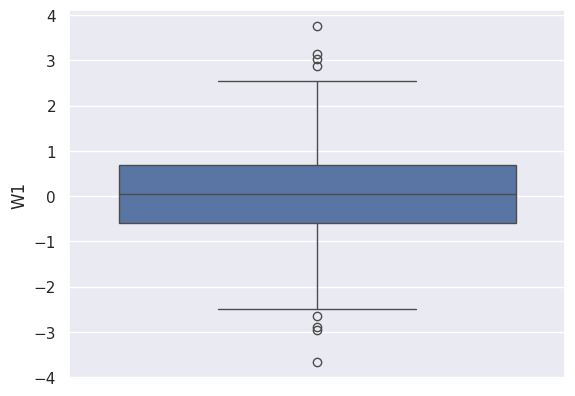

In [21]:
sns.boxplot(df["W1"])
plt.show()

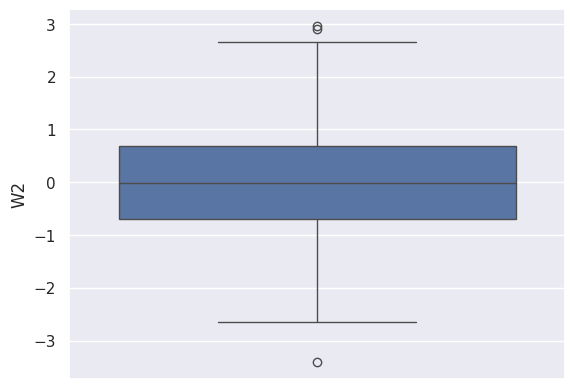

In [22]:
sns.boxplot(df["W2"])
plt.show()

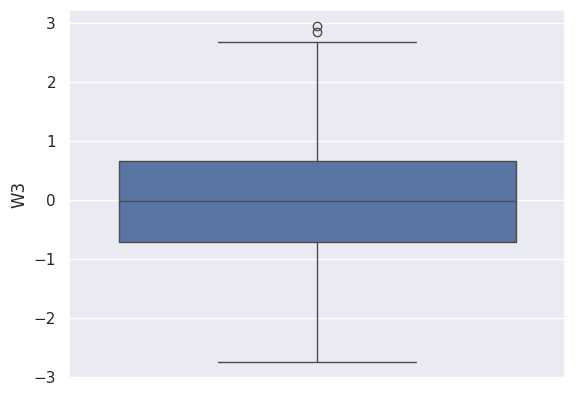

In [23]:
sns.boxplot(df["W3"])
plt.show()

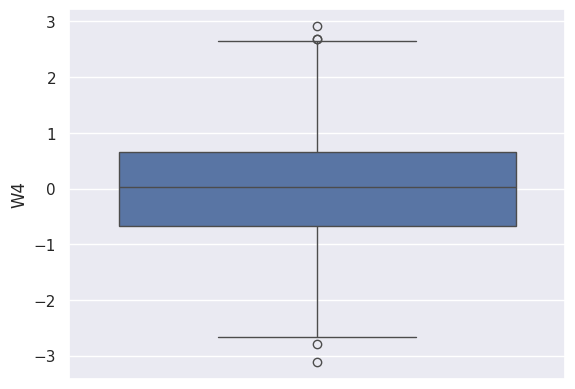

In [24]:
sns.boxplot(df["W4"])
plt.show()

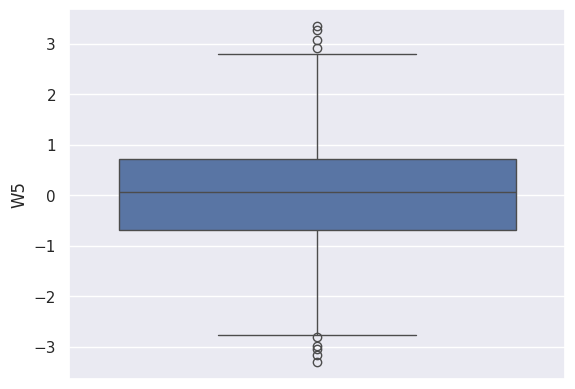

In [25]:
sns.boxplot(df["W5"])
plt.show()

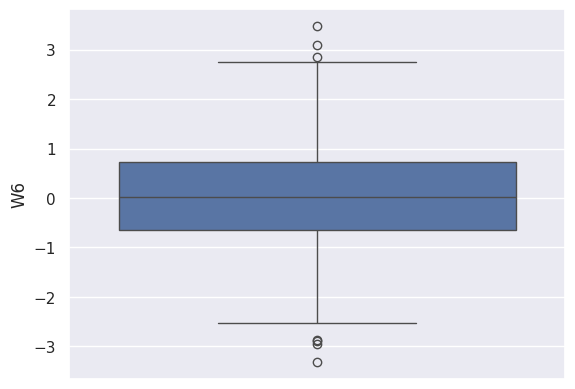

In [26]:
sns.boxplot(df["W6"])
plt.show()

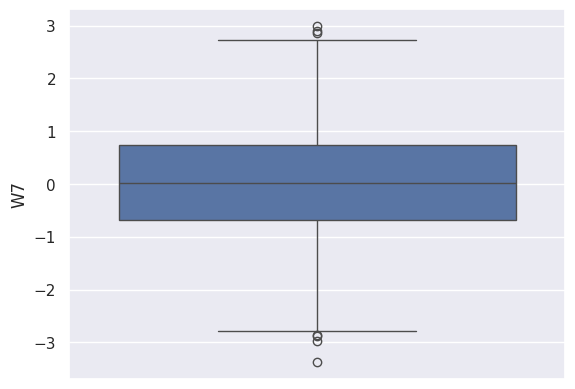

In [27]:
sns.boxplot(df["W7"])
plt.show()

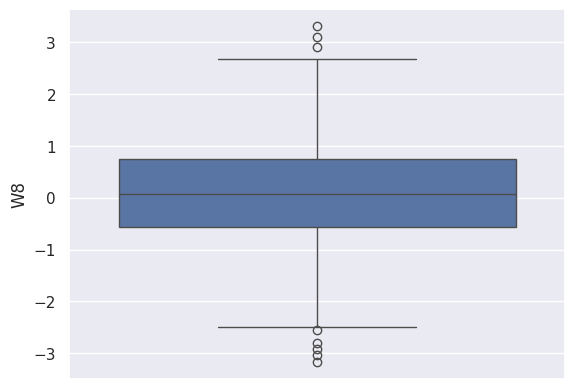

In [28]:
sns.boxplot(df["W8"])
plt.show()

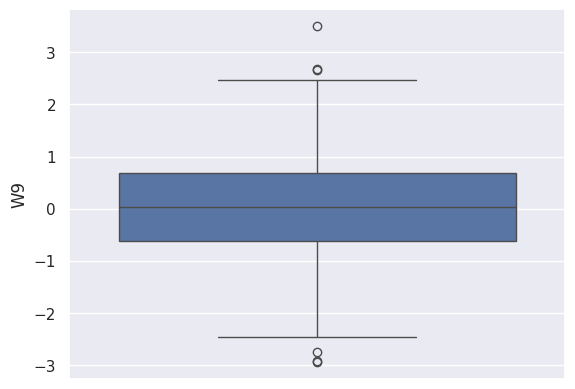

In [29]:
sns.boxplot(df["W9"])
plt.show()

In [30]:
# train test split
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["MSE"], axis=1), df["MSE"], test_size=0.3, random_state=7)

In [ ]:
# imprting Xgboost regressor

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

In [38]:
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [39]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [40]:
predictions = np.maximum(0, model.predict(X_test))

In [42]:
# Evaluate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, predictions))
print("RMSLE:", rmsle)

RMSLE: 0.13133108263989424


In [43]:
# let's check for overfitting:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_log_error

rmsle_scorer = make_scorer(
    lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, np.maximum(0, y_pred))),
    greater_is_better=False
)

In [44]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [45]:
scores = cross_val_score(model, df.drop(columns=["MSE"]), df["MSE"],
                         scoring=rmsle_scorer, cv=kfold)


In [46]:
print("RMSLE scores for each fold:", -scores)  # negate since we used greater_is_better=False
print("Mean RMSLE:", -scores.mean())
print("Std deviation:", scores.std())

RMSLE scores for each fold: [0.13826822 0.14014846 0.13342097 0.12057011 0.13743519]
Mean RMSLE: 0.13396859177132803
Std deviation: 0.007050021348070053


In [48]:
# let's predict actual values
df2 = pd.read_csv("/content/test_weights.csv")

In [49]:
df2.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9
0,0.370,-0.424,0.190,-1.882,2.893,-0.070,-1.191,0.521,-0.882,-1.231
1,1.162,-0.310,0.915,-0.297,-0.994,-0.500,0.202,0.508,1.848,1.147
2,1.691,1.329,-0.383,-0.852,-0.576,0.698,0.036,0.442,-0.518,-0.129
3,0.199,1.034,-0.673,1.376,-0.221,-0.256,-0.196,0.217,0.918,-1.259
4,0.005,-0.888,0.049,1.148,-1.260,-1.746,-1.398,-1.417,-0.912,-0.367


In [55]:
df2.shape

(100, 10)

In [51]:
df2.isnull().sum()

,0
W0,0
W1,0
W2,0
W3,0
W4,0
W5,0
W6,0
W7,0
W8,0
W9,0


In [52]:
y_pred = np.maximum(0, model.predict(df2))

In [53]:
y_pred

array([ 54.44165 ,  76.8801  ,  54.257027,  30.625422,  76.13908 ,
        30.715456, 112.4362  ,  22.577158,  41.878696,  60.61728 ,
        82.41145 ,  45.266148,  57.086514,  80.67843 ,  58.50745 ,
        59.896297,  52.401344,  46.286003,  52.244133,  44.363537,
        57.240513,  38.12807 ,  34.508553,  54.35297 ,  36.752754,
        35.633995,  63.564495,  86.389404,  73.530304,  95.96228 ,
        46.37021 ,  38.18364 ,  26.905972,  70.4441  ,  31.612656,
        57.823105,  17.368803,  25.920427,  22.420767,  32.095818,
        38.607216,  80.70984 ,  34.984016,  40.27831 ,  68.73317 ,
        47.4931  ,  41.27913 ,  45.792618,  46.12227 ,  32.12108 ,
        44.573845,  64.95921 ,  56.835117,  74.30056 ,  62.247982,
        42.420994,  41.075626,  90.93819 ,  59.088127,  43.639835,
        60.20818 ,  33.896954,  60.244324,  29.427166,  61.559193,
        66.29019 ,  43.147495,  68.77919 ,  38.32065 ,  62.996803,
        58.352146,  43.13274 ,  70.22984 ,  48.15378 ,  70.494

In [54]:
len(y_pred)

100

In [57]:
pred_df = pd.DataFrame(y_pred, columns=["predicted_MSE"])
pred_df.head()

,predicted_MSE
0,54.441650
1,76.880096
2,54.257027
3,30.625422
4,76.139076


In [58]:
merged_df = df2.reset_index(drop=True)

In [59]:
merged_df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9
0,0.370,-0.424,0.190,-1.882,2.893,-0.070,-1.191,0.521,-0.882,-1.231
1,1.162,-0.310,0.915,-0.297,-0.994,-0.500,0.202,0.508,1.848,1.147
2,1.691,1.329,-0.383,-0.852,-0.576,0.698,0.036,0.442,-0.518,-0.129
3,0.199,1.034,-0.673,1.376,-0.221,-0.256,-0.196,0.217,0.918,-1.259
4,0.005,-0.888,0.049,1.148,-1.260,-1.746,-1.398,-1.417,-0.912,-0.367


In [61]:
merged_df["Predicted_MSE"] = pred_df["predicted_MSE"]

In [62]:
merged_df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,Predicted_MSE
0,0.370,-0.424,0.190,-1.882,2.893,-0.070,-1.191,0.521,-0.882,-1.231,54.441650
1,1.162,-0.310,0.915,-0.297,-0.994,-0.500,0.202,0.508,1.848,1.147,76.880096
2,1.691,1.329,-0.383,-0.852,-0.576,0.698,0.036,0.442,-0.518,-0.129,54.257027
3,0.199,1.034,-0.673,1.376,-0.221,-0.256,-0.196,0.217,0.918,-1.259,30.625422
4,0.005,-0.888,0.049,1.148,-1.260,-1.746,-1.398,-1.417,-0.912,-0.367,76.139076


In [65]:
merged_df = merged_df.rename(columns={"Predicted_MSE": "MSE"})

In [66]:
merged_df.to_json("answers.json", orient="records", indent=4)